# Project Adv ML

In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy
from scipy import special
import pandas as pd

### Setup

## Load the Document Corpus
Download the data from 
https://github.com/Blei-Lab/lda-c/blob/master/example/ap.tgz

We can directly load the file "ap.dat" which contains:

1 line = 1 document,

[number of different words in doc] [word index (where the one is in w_n]:[how often it occurs in the doc] [word index 2]:[occurences 2] ...

In [12]:
vocab = pd.read_csv("./ap/vocab.txt", header=None)
V = vocab.shape[0] # Vocab Size given by vocab_list.txt
# vocab.head(10)

In [4]:
data = pd.read_csv('ap/ap.dat', sep="#", names=['A'])
M = data_np.shape[0]
data = data.A.str.split(' ')
doc_word_count = np.zeros((M, V))

for j, m in enumerate(data):
    count = m.pop(0)
    for i in range(int(count)):
        type(m[i])
        cur = m[i].split(":")
        doc_word_count[j][int(cur[0])] = int(cur[1])
        


In [42]:
data = pd.read_csv('ap/ap.dat', sep="#", names=['A'])



data = data.A.str.split(' |:', n=V, expand=True)
data.head()
data_np = data.values


In [49]:
D = []  # this has dim: M x 2 (words and counts) x N_words(document)
for w in range(M): # for each document
    doc_string = data_np[w,:]
    #print(len(doc_string))
    word_indices = doc_string[1::2]
    #print("word_indices", word_indices)
    counts = doc_string[2::2]
    #if w==1:
    #  print(len(word_indices), len(counts))
    #print("counts", counts)
    N_different_words_in_this_doc = doc_string[0] # not needed.
    D.append([])
    all_words = []
    for n,word in enumerate(word_indices):
        if word==None:
            break
        for repetition in range(int(counts[n])):
            #if int(counts[n])>1:
            #  print(word, counts[n])
            all_words.append(int(word))
    D[-1]=all_words
  # NOTE: D does not contain M docs with each N_d words, where each word w_n is a V-dim vector.
  # BUT:              it has M docs with each N_d words, where each word is just the unique index v, that is one of the V-dim vector.
  # Reason: V=10,000...



2246
263


TypeError: object of type 'int' has no len()

In [85]:
M,V

(2246, 10473)

Text(0, 0.5, 'count')

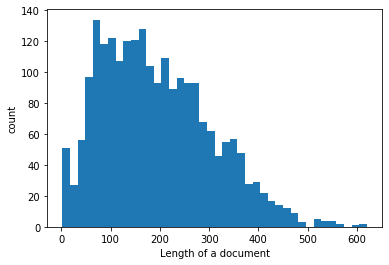

In [7]:
lengths = []
for i in range(len(D)):
    lengths.append(len(D[i]))
p = plt.hist(lengths, bins=40)
plt.xlabel("Length of a document")
plt.ylabel("count")



## Remove the standard words and load new Dataset (Reuters)

#### Import the Natural Langauge Processing Package
This provides the Reuters articles

In [86]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/peter/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/peter/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/peter/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/peter/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/peter/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/peter/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!

True

#### Download the reuters data, if not already downloaded

In [88]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import reuters
nltk.download('reuters')

[nltk_data] Downloading package reuters to /home/peter/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

The variable reuters consists of 10788 documents, with a few labeled as test and 7769 as training documents.

Below, we get the filenames of the training ones

In [61]:
training_ids = []
test_ids = []
for name in reuters.fileids():
    if "training" in name:
        training_ids.append(name)
    else:
        test_ids.append(name)
print("M_max_reuters = ", len(training_ids) )

M_max_reuters =  7769


There are more documents than in the AP example above. Hence, we choose only those 2246 documents (for now) and compare it

In [90]:
M_reuters = 2246 

training = includes a list of all the chosen documents. Each of these elements contains a list of all the words in the document

In [91]:
training=[]  
for i in range(M_reuters):
    file=str(i+1)
    file = training_ids[i] # filename
    training.append(reuters.words(file)) #append the document to training

doc_lengths =  [len(training[i]) for i in range(len(training))] # this is N_d (length of each of the documents)
print("We have ", len(training), " Documents with sizes: ", doc_lengths[:100])


We have  2246  Documents with sizes:  [633, 259, 119, 155, 115, 34, 250, 83, 182, 133, 126, 85, 84, 111, 99, 101, 67, 26, 73, 140, 108, 173, 49, 236, 109, 111, 365, 42, 66, 49, 130, 90, 52, 21, 136, 14, 28, 102, 110, 67, 72, 143, 196, 31, 24, 34, 601, 32, 123, 958, 193, 118, 36, 55, 54, 113, 36, 67, 569, 25, 100, 185, 60, 145, 78, 61, 10, 87, 252, 61, 151, 466, 128, 44, 25, 179, 180, 54, 167, 42, 76, 114, 301, 506, 78, 83, 51, 111, 254, 10, 136, 186, 127, 145, 85, 34, 34, 91, 68, 77]


### Actually create the dataset and vocab_list

Example:  

a sentence/document: "You have a cactus." 

    - want to remove the "you", the "a" and the "." (stopwords) 
    - add the rest to my vocab_list ie. vocab_list= ["have", "cactus"].
    - Then, store the document as a list of indices from my vocab: Ie. the document above is stored as [0,1].
- the Vocab is a list of all the (non-unnecessary) words in the corpus


In [92]:
vocab_list=[] # 

def create_dict(data):     
    global vocab_list # change the global vocab_list
    D=[]  # dim = (#documents, #N_reduced_d),    where N_reduced_d is the Nr of words that are not filtered / are not unnecessary
    for d in data: # for each document
        # Uncomment 3 lines below to test the function with the string below 
        #test=True
        #if test==False: 
        #    d = " ".join(d)
        d = " ".join(d)
        dclean = remove_unnecessary_words(d)   # list of all the non-unnecessary words of the document
        d_vocabInd = []  # This is the document in terms of the indices of the words in the vocab_list (example above: [0,1])
        for w in dclean:  # loop through these words
            w = w.lower() 
            if w in vocab_list: 
                pass # word is already in vocab_list
            else:
                #add word to vocab_list
                vocab_list.append(w)
            
            # Store the word as the document
            v = vocab_list.index(w) #index v
            d_vocabInd.append(v)
            
        D.append(d_vocabInd)   # Add document to corpus
    return D


def remove_unnecessary_words(document):
    words = word_tokenize(document)
    wordsFiltered = []
    for w in words:
        if conditions(w):  # all the conditions what defines an unnecessary word
            # word is not unnecessary --> add to cleaned document
            wordsFiltered.append(w)
            
    return wordsFiltered


def conditions(word):
    '''Return True if all conditions are fulfilled'''
    Cond=True
    # Word is no stopword
    Cond *= (word not in stopwords.words('english'))
    # Word is no special sign (like ".")
    Cond *= (word not in ['.', ',', ';', '-', '+', \
                             '?', '!', '=', '(', ')', \
                            '/', '&', '$', '€'])
    # Word is no float ("4.2")
    if ("." in word) or ("," in word):
        if word[0].isdecimal():
            Cond=False
    # Word is no digit
    Cond *= (not word.isdigit())
    Cond *= (not word.isdecimal())
    
    return Cond

'''TEST
data_test = ["All work and no play makes 4 jack dull boy.", 
        "All people make mistakes, but 4 5 jack makes no work.",
        "People are dull, jack makes 4.5 mistakes"]

D = create_dict(data_test, test=True)
D, vocab_list
'''
''''''

''

#### Actually do the pre-processing

In [94]:
vocab_list=[] # init vocab_list

D_reuters=create_dict(training)

print("Rows = Document[1..M] (first 100 docs only), Column = Word_in_Doc[1...N_doc], data = Index in Vocab")
print(pd.DataFrame(D_reuters[:100], dtype=int ))
#print(vocab_list)

Rows = Document[1..M] (first 100 docs only), Column = Word_in_Doc[1...N_doc], data = Index in Vocab
     0     1       2       3       4       5       6       7       8    \
0      0     1     2.0     3.0     4.0     5.0     6.0     0.0     1.0   
1    158   159   160.0   161.0   162.0   163.0   164.0   165.0   158.0   
2    176   241   242.0   243.0   244.0   245.0   246.0   247.0   113.0   
3    260   261    44.0   262.0   263.0   161.0   264.0   163.0   265.0   
4    298   161   299.0   163.0   300.0   301.0   302.0   303.0   304.0   
5    328   329   186.0   330.0   331.0   161.0   328.0   329.0   332.0   
6    134   340   341.0   342.0    61.0   343.0   344.0   345.0   346.0   
7    412   166   161.0   413.0   163.0    31.0   303.0   414.0   415.0   
8    426   427   428.0   252.0   191.0    85.0   429.0   427.0   428.0   
9    449   450   451.0     1.0   452.0   453.0   454.0    26.0   113.0   
10   490   491   492.0    24.0   493.0   494.0   495.0   496.0   497.0   
11   534   1

### Following: Just analysis of the Reuters data.

In [95]:
V_reuters = len(vocab_list)
M_reuters = len(D_reuters)
print("V ",V_reuters, ", M ", M_reuters)

V  13492 , M  2246


Text(0.5, 1.0, 'Reuters')

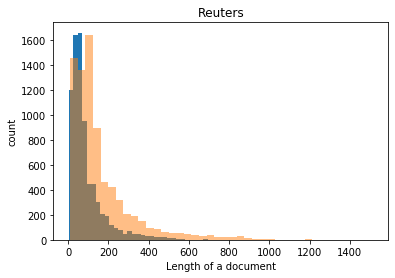

In [67]:
lengths = [] # Lengths of the cleaned documents 
for i in range(len(D_reuters)):
    lengths.append(len(D_reuters[i]))
p = plt.hist(lengths, bins=40)
p = plt.hist(doc_lengths, bins=40, alpha=0.5) # document lengths (uncleaned)

print(np.mean(doc_lengths), np.mean(lengths))

plt.xlabel("Length of a document")
plt.ylabel("count")
plt.title("Reuters")

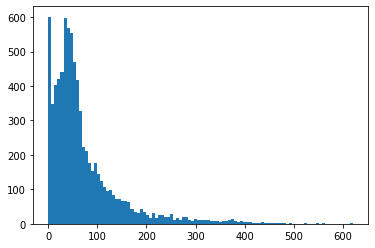

In [69]:
# How many words did the cleaning remove?
removed_words = np.array(doc_lengths)-np.array(lengths)
bla = plt.hist(removed_words, bins=100)

In [97]:
#Percentage of docs in which we removed from 20 to 100 words, and mean
print("Percentage:", np.sum(((removed_words<=100)*(removed_words>=20)))/removed_words.shape[0])
print(np.mean(removed_words), np.std(removed_words))

Percentage: 0.6048397477152787
71.60381001415884 73.40024979345601


In [98]:
print("Example: ")
print("\n D AP:")
print(D[100][:15], "   Note: if the same word appears more often in the doc, it appears in direct sequence. Hence, the same index might appear multiple times in sequence")
print("\n D Reuters:")
print(D_reuters[100][:15])

Example: 

 D AP:
[0, 0, 0, 0, 0, 0, 256, 256, 256, 3, 3, 4, 4, 4, 4]    Note: if the same word appears more often in the doc, it appears in direct sequence. Hence, the same index might appear multiple times in sequence

 D Reuters:
[582, 617, 161, 2060, 163, 300, 87, 31, 303, 582, 617, 332, 24, 311, 676]


### Variational Inference (the E-Step)

In [335]:
def updateGammaPhi(k, alpha, beta, w, tol=10**(-5), MAX_STEPS=100, verbose=False):
    ''' This implements the update equations for Gamma and Phi for a variational inference step.
     Inputs: 
        k=int=nr of topics;  
        alpha=[k]-vec=priors_of_theta(mixture_weights);  
        beta=[NxV]-matrix=prob_of_word_v_given_topic_
    '''
    N = len(w)
    # Init    
    phi = 1/k * np.ones([N,k])
    gamma = alpha + np.ones([k]) * N/k 
    
    q_old = compute_lower_bound_likelihood(w,k,phi,gamma, alpha, beta, verbose = verbose)
    converged = False
    
    #Loop
    security_count=0
    
    while (not converged) and (security_count < MAX_STEPS):
        security_count+=1
        
        phi_old = np.copy(phi)
        logphi = np.zeros_like(phi)
        gamma_old = np.copy(gamma)
        
        for n in range(N):
            for i in range(k):
                w_n = w[n] ## this is not a V-Vector, but just the index of the word in the vocab
                #beta_iv is p(w_n^v = 1 | z^i = 1) 
                v = w_n   #unique v for each word w_n
                
                ### TRICK: instead of phi=beta+e^{psi(gamma)}, do 
                logphi[n,i] = np.log(beta[i,v]) + (psi(gamma_old[i]))#
                phi[n,i] = np.exp(logphi[n,i])
                
            #normalize Phi: s.t. for each topic the sum of phi[n,:] is 1.
            phi[n,:] = phi[n,:]/np.sum(phi[n,:])
        gamma = alpha + np.sum(phi,axis=0)
       
        # Convergence criterion is: lower bound of likleihood
        q_new = compute_lower_bound_likelihood(w,k,phi,gamma, alpha, beta, verbose=verbose)
        #print("Liks, ", q_new, q_old)#,  compute_lda_lhood(w,phi,gamma,alpha,beta,k))
        if abs(q_new-q_old)/q_old < tol:
            converged = True
        else: 
            q_old=np.copy(q_new)
        
    return q_new, gamma, phi

def psi(gamma_i):
    # this is the first derivative (via Taylor approximation) of the log \Gamma function
    # according to Wikipedia this is the "digamma" function
    return scipy.special.digamma(gamma_i)



In [336]:
def compute_lower_bound_likelihood(w,k,phi,gamma, alpha, beta, verbose=False):
    '''
    This calculate the lower bound of L(gamma, phi, alpha, beta)
    Ie. equation 15 in the paper in Appendix 3.
    Only one 
    '''
    
    N = len(w)
    global V # length of the vocab
    
    loggamma_sum = lambda x: scipy.special.gammaln(np.sum(x))
    loggamma_x_i = lambda x, i: np.log(scipy.special.gamma(x[i]))
    E_log_thetai_givenGamma = lambda i:  (psi(gamma[i]) - psi(np.sum(gamma))) 

    #print("gamma, alpha= ", gamma,alpha)
    L = loggamma_sum(alpha) - loggamma_sum(gamma)
    #if verbose: print("#0: ", L, end=", ")
    for i in range(k):
        L += -loggamma_x_i(alpha,i) + (alpha[i]-1)*E_log_thetai_givenGamma(i)
        L += +loggamma_x_i(gamma,i) - (gamma[i]-1)*E_log_thetai_givenGamma(i)
        #if verbose: print("#",i,": ", L, end=", ")
        for n in range(N):
            L+= phi[n,i] * E_log_thetai_givenGamma(i)
            L+= - phi[n,i] *np.log(phi[n,i])
            v = w[n] # here w_n is not a vector
            L+= phi[n,i] * np.log(beta[i,v]) 
            #if verbose: print("#",i,",",n,": ", L, ", v=",v, end=", ")
    if verbose: print(L, "\n")
    return L
    

In [337]:
def E_step(k, alpha,beta, MAX_COUNTER=10, verbose=False):
    gamma_list = []
    phi_list = []
    counter=0
    likelihood_list = []
    for d, doc in enumerate(D):
        counter+=1
        # doc is a N_d Vector containing indices of all words
        if verbose: print("Doc: "+str(d)+" ("+str(len(doc))+")", end=", ")#, len(doc[0]))
        likelihood, gamma, phi = updateGammaPhi(k,alpha,beta,doc, verbose=verbose)
        gamma_list.append(gamma)
        phi_list.append(phi)
        likelihood_list.append(likelihood)
        # Stop this if sufficient statistics (how do i know this?)
        if verbose and counter%10 ==0:
            print(gamma, likelihood)
        # calculate the approximate q(theta, z | gamma, phi)
        if counter> MAX_COUNTER:
            break
    return likelihood_list, gamma_list, phi_list


## M-Step

In [338]:
# def M_step(): 

SyntaxError: unexpected EOF while parsing (<ipython-input-338-bc2016d8a2a2>, line 2)

## Initialisation

In [340]:
k= 4
V= 10473

alpha=np.ones([k])*0.01

beta = np.zeros([k,V])+0.01


In [343]:
likelihood_list, gamma_list, phi_list = \
    E_step(k,alpha,beta, MAX_COUNTER=100, verbose=False) # MAX_COUNTER == Training set size

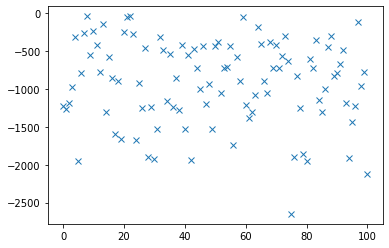

In [342]:
plt.plot(likelihood_list, 'x')